
<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/06_advanced_plotting/06_workalong02_mapping_SOLUTION.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Mapping

This workalong and exercise introduce mapping in `matplotlib`. We'll build from the figure we created in the first workalong.

In [1]:
""" Import libraries """
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr

# set the default plot style
plt.style.use('seaborn-v0_8-poster')

In [2]:
""" Load the dataset """

input_file = "air.2m.gauss.2021.nc"

# open the dataset using xarray
temp_ds = xr.open_dataset(input_file, chunks = -1)

""" Calculate the hottest temperature recorded in each season. """

# xarray is built on top of pandas, so we can use groupby for this
season_groups = temp_ds.groupby('time.season')

# calculate the max in each season
season_max_temp = season_groups.max()

# extract temperature (and also use 'squeeze' to remove the pesky single-item level dimension)
max_temp_xr = season_max_temp['air'].squeeze()

# pull out coordinates
seasons = max_temp_xr.season
lat = max_temp_xr.lat
lon = max_temp_xr.lon

# force the calculation
max_temp_xr.load();

# Cartopy

For mapping, we'll use `cartopy`.  Cartopy defines *projection* as the map projection on which the dataset will be drawn.  It defines the *transform* of the dataset as the projection on which the dataset exists.  They can be the same, but they don't have to be.

Let's just explore projections.

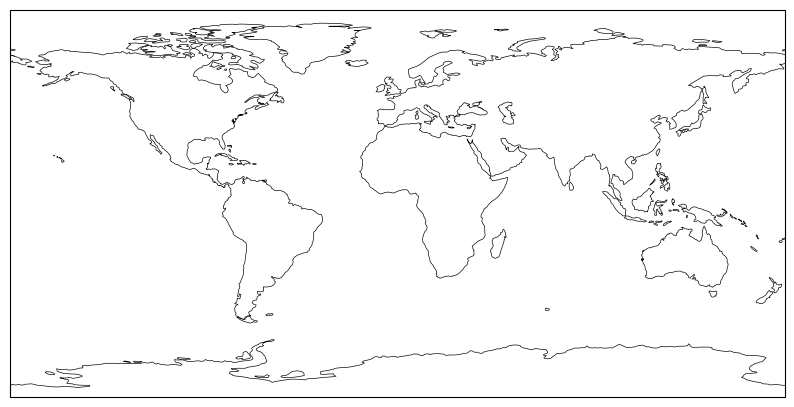

In [3]:
# set the projection
projection = cartopy.crs.PlateCarree()

# create a single panel figure with the projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))

# add coastlines
ax.coastlines()

# use a global extent
ax.set_global()

# draw the plot
plt.show()


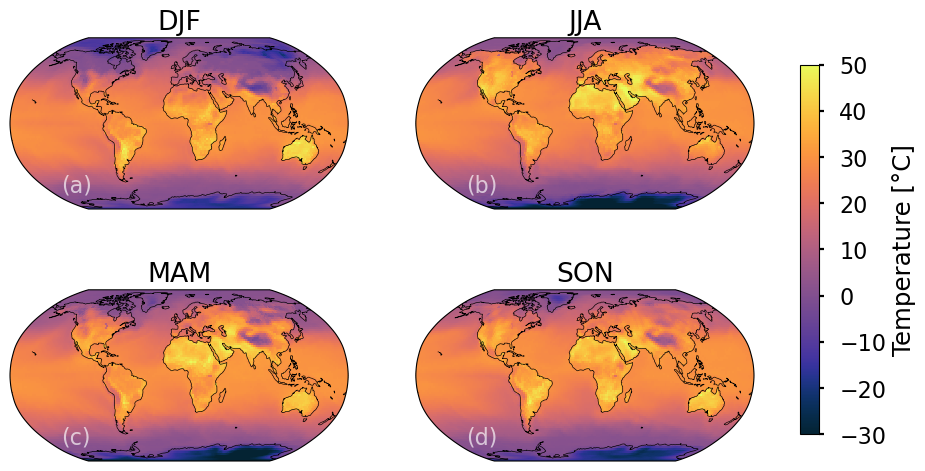

In [4]:
""" Plot the hottest temperature recorded in each season with maplines. """

# set the colormap
cmap = cmocean.cm.thermal

# set the projection
projection = cartopy.crs.Robinson()

# generate a 2x2 panel figure with a better aspect ratio
fig, axs2d = plt.subplots(
    2,2,
    figsize = (12, 6),
    sharex = True,
    sharey = True,
    subplot_kw = dict(projection = projection),
    )

# create a vector of plots (first index is the top left)
axs = axs2d.ravel()

# set panel labels
labels = ['(a)', '(b)', '(c)', '(d)']

for ax, season, label in zip(axs, seasons, labels):
    # select the data for this season and convert to C
    temp_this_season = max_temp_xr.sel(season = season) - 273.15


    # plot temperature using pcolormesh (each value in the array is assigned a color)
    cplt = ax.pcolormesh(
        lon,
        lat,
        temp_this_season,
        cmap = cmap,
        vmin = -30,
        vmax = 50,
        transform = cartopy.crs.PlateCarree(),
        )

    # set the title to the season
    ax.set_title(str(season.values))

    # add coastlines
    ax.coastlines()

    # add a panel label in the lower left of each panel
    ax.text(0.15, 0.1, label, transform = ax.transAxes, fontsize = 16, color = '#FFFFFFAA' )


# add a common colorbar
fig.colorbar(cplt, ax = axs, shrink = 0.8, label = "Temperature [°C]")

plt.show()